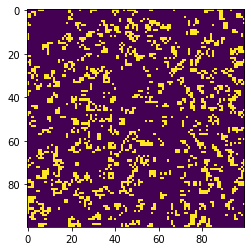

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 100
ON  = 1
OFF = 0
vals = [ON, OFF]

def randomGrid(N):
    return np.random.choice(vals, N*N, p = [0.2, 0.8]).reshape(N, N)

def addGlider(i, j, grid):
    glider = np.array([[0, 0, 1],
                       [1, 0, 1],
                       [0, 1, 1]])
    grid[i:i + 3, j:j + 3] = glider

def update(frameNum, img, grid, N):
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            total = (grid[i, (j - 1)%N] + grid[i, (j + 1)%N] +
                     grid[(i - 1)%N, j] + grid[(i + 1)%N, j] +
                     grid[(i - 1)%N, (j - 1)%N] + grid[(i - 1)%N, (j + 1)%N] +
                     grid[(i + 1)%N, (j - 1)%N] + grid[(i + 1)%N, (j + 1)%N])
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img, 

glider = False
updateInterval = 50
colormap = "viridis"

grid = np.array([])
if glider:
    grid = np.zeros(N*N).reshape(N, N)
    addGlider(1, 1, grid)
else:
    grid = randomGrid(N)

fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation = "nearest", cmap = colormap)
ani = FuncAnimation(fig, update, fargs = (img, grid, N, ),
                    frames = 10, interval = updateInterval,
                    save_count = 50)

plt.show()